In [1]:
from pathlib import Path
from scan_analysis.base import ScanAnalyzerInfo as Info
from scan_analysis.execute_scan_analysis import instantiate_scan_analyzer
from image_analysis.offline_analyzers.beam_analyzer import (
    BeamAnalyzer,
)
from image_analysis.config_loader import set_config_base_dir
from geecs_data_utils import ScanTag

from scan_analysis.analyzers.common.array2D_scan_analysis import Array2DScanAnalyzer

import logging

logging.getLogger("image_analysis").setLevel(logging.WARNING)
logging.getLogger("scan_analysis").setLevel(logging.WARNING)

set_config_base_dir(
    Path(
        "D:/Users/sbarber.BELLAAPPSERVER/Documents/GitHub/GEECS-Plugins/image_analysis_configs"
    )
)

2025-10-01 14:10:44,757 - root - WARNING - Could not properly load docgen, results will not auto-populate scan log.


Failed to load config file from: D:\Users\sbarber.BELLAAPPSERVER\Documents\GitHub\GEECS-Plugins\LogMaker4GoogleDocs\logmaker_4_googledocs\config.ini


2025-10-01 14:10:45,989 - image_analysis.config_loader - INFO - Config base dir set to D:\Users\sbarber.BELLAAPPSERVER\Documents\GitHub\GEECS-Plugins\image_analysis_configs


In [2]:
import time


dev_name = "UC_Amp4_IR_input"
config_dict = {
    "camera_config_name": dev_name,
}
analyzer_info = Info(
    scan_analyzer_class=Array2DScanAnalyzer,
    requirements={dev_name},
    device_name=dev_name,
    scan_analyzer_kwargs={"image_analyzer": BeamAnalyzer(**config_dict)},
)

t0 = time.monotonic()
year = 2025
month = 2
day = 20
number = 14
experiment = "Undulator"
test_tag = ScanTag(
    year=year, month=month, day=day, number=number, experiment=experiment
)
scan_analyzer = instantiate_scan_analyzer(scan_analyzer_info=analyzer_info)
scan_analyzer.run_analysis(scan_tag=test_tag)
t1 = time.monotonic()
print(f"execution time: {t1 - t0}")

2025-10-01 14:10:45,998 - image_analysis.config_loader - INFO - Found configuration file: D:\Users\sbarber.BELLAAPPSERVER\Documents\GitHub\GEECS-Plugins\image_analysis_configs\UC_Amp4_IR_input.yaml
2025-10-01 14:10:46,004 - image_analysis.config_loader - INFO - Loaded camera configuration from D:\Users\sbarber.BELLAAPPSERVER\Documents\GitHub\GEECS-Plugins\image_analysis_configs\UC_Amp4_IR_input.yaml
2025-10-01 14:10:46,004 - image_analysis.offline_analyzers.standard_analyzer - INFO - Loaded configuration for camera: UC_Amp4_IR_input
2025-10-01 14:10:46,011 - root - INFO - analysis path is : Z:\data\Undulator\Y2025\02-Feb\25_0220\analysis\Scan014
2025-10-01 14:10:46,015 - root - INFO - Scan parameter is: noscan.
2025-10-01 14:10:46,016 - root - WARNING - No parameter varied during the scan, setting noscan flag.
2025-10-01 14:10:51,246 - image_analysis.processing.background_manager - INFO - Computing dynamic background from batch...
2025-10-01 14:10:52,827 - image_analysis.processing.bac

execution time: 61.25


In [6]:
from geecs_data_utils.scan_data import ScanData
from image_analysis.offline_analyzers.beam_analyzer import BeamAnalyzer

sd = ScanData.from_date(
    year=year, month=month, day=day, number=number, experiment=experiment
)

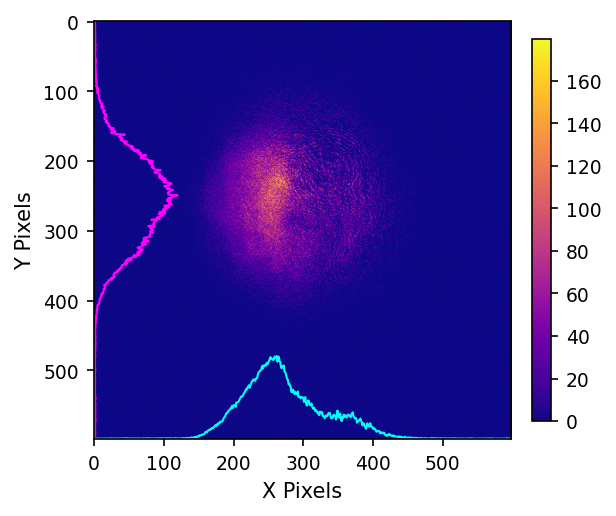

(<Figure size 600x600 with 2 Axes>,
 <Axes: xlabel='X Pixels', ylabel='Y Pixels'>)

In [20]:
analyzer = BeamAnalyzer(camera_config_name=dev_name)
file_path = sd.data_frame[f"{dev_name}_expected_path"][9]

bkg_cfg = analyzer.camera_config.background

scan_dir = sd.paths.get_folder() / dev_name
bkg_path_template = analyzer.camera_config.background.file_path
bkg_path = bkg_path_template.format_map({"scan_dir": scan_dir})

new_bkg_config = bkg_cfg
new_bkg_config.file_path = bkg_path
new_bkg_config.additional_constant = 0

analyzer.update_config(background=new_bkg_config)

results = analyzer.analyze_image_file(image_filepath=file_path)
analyzer.visualize(results)